<a href="https://colab.research.google.com/github/Bearson-norm/SK_ADS/blob/main/Program/serkom_preprocessed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tujuan Bisnis dari Data yang Didapat**
Untuk memprediksi calon nasabah apakah dapat membayar kredit lancar atau macet berdasarkan data history tahun lalu. (data terlampir)

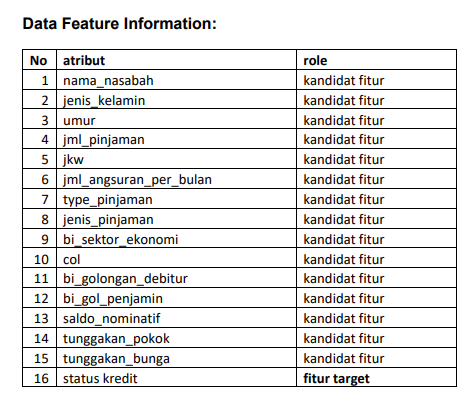


In [ ]:
import warnings; warnings.simplefilter('ignore')
import time, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
sns.set(style="ticks", color_codes=True)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menampilkan fitur dari masing-masing kolom, menghilangkan kolom nama nasabah, dan memfilter parameter umur yang sesuai

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/df/creditapproval-data_kotor.csv', sep=';')
df = df[(df['umur']>=1)]
df = df.drop('nama_nasabah', axis=1)
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df

baris =  744 , Kolom (jumlah variabel) =  15


,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,40.0,345000,1.0,345000,100,301,6000.0,1,874,875,345000,345000,0,MACET
1,L,31.0,350000,7.0,55716,100,301,6000.0,1,874,875,390000,111428,0,MACET
3,P,2.0,459168,NaN,38264,100,301,6000.0,1,874,875,459168,382640,0,MACET
4,WANITA,34.0,3055499,8.0,"381937,41",100,301,6000.0,1,874,875,3055499,"1527749,48",0,MACET
5,L,49.0,2000000,NaN,0,100,301,6000.0,1,874,875,-85000,0,0,LANCAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,L,38.0,1000000,16.0,70000,100,301,6000.0,2,874,0,812500,812500,97500,MACET
762,P,36.0,1000000,12.0,"90833,37",100,301,6000.0,2,874,0,429000,429000,45000,MACET
763,L,28.0,2000000,10.0,260000,100,301,6000.0,2,874,0,600000,600000,180000,MACET
764,P,31.0,1312500,7.0,198750,100,301,6000.0,2,874,0,1312500,1312500,78750,MACET


In [ ]:
df.describe()

,umur,jkw,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin
count,744.000000,741.000000,744.0,744.000000,743.000000,744.000000,744.000000,744.000000
mean,39.581989,19.126856,100.0,301.200269,6013.432032,1.216398,873.967742,280.209677
std,38.088602,32.483095,0.0,0.831059,219.366118,0.412066,1.481708,407.662544
min,1.000000,1.000000,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000
25%,32.000000,8.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000
50%,38.000000,12.000000,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000
75%,44.000000,20.000000,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000
max,1043.000000,679.000000,100.0,305.000000,9990.000000,2.000000,876.000000,875.000000


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,jenis_kelamin,jml_pinjaman,jml_angsuran_per_bulan,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,345000,345000,345000,345000,0,MACET
1,L,350000,55716,390000,111428,0,MACET
3,P,459168,38264,459168,382640,0,MACET
4,WANITA,3055499,"381937,41",3055499,"1527749,48",0,MACET
5,L,2000000,0,-85000,0,0,LANCAR


In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 765
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   jenis_kelamin           744 non-null    category
 1   umur                    744 non-null    float64 
 2   jml_pinjaman            744 non-null    category
 3   jkw                     741 non-null    float64 
 4   jml_angsuran_per_bulan  744 non-null    category
 5   type_pinjaman           744 non-null    int64   
 6   jenis_pinjaman          744 non-null    int64   
 7   bi_sektor_ekonomi       743 non-null    float64 
 8   col                     744 non-null    int64   
 9   bi_golongan_debitur     744 non-null    int64   
 10  bi_gol_penjamin         744 non-null    int64   
 11  saldo_nominatif         744 non-null    category
 12  tunggakan_pokok         744 non-null    category
 13  tunggakan_bunga         744 non-null    category
 14  status kredit           74

In [ ]:
catVar = df.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

jenis_kelamin :  {'L', 'PRIA', 'P', 'WANITA', 'PEREMPUAN', 'LAKI-LAKI'}
jml_pinjaman :  {'561250', '1944442', '126670', '430000', '267669', '225000', '840278', '788120', '1260000', '1086000', '1833334', '1960000', '1559581', '131670', '576650,2', '590834', '245166', '340000', '200000', '600000', '567501', '325358,64', '2312000', '680000', '472500', '3800000', '4000000', '425000', '20000000', '166333,36', '2540000', '750000', '1670000', '950000', '1385000', '1499333', '2330402', '896000', '2040000', '4435001', '461671', '437500', '2950000', '2665000', '670000', '2187500,02', '3520000', '215835', '3334000', '459168', '1241666,68', '383750', '1130000', '1178000', '100000', '38500000', '300000', '333333,36', '1458333,35', '1013932', '3066000', '666666,72', '550000', '42500000', '1200000', '1116263', '390000', '783500', '1125000', '2065000,01', '610000', '195000', '975000', '1950000', '177333,34', '646666,67', '1420000', '5500000', '960335,52', '1500000', '7083331', '315000', '185169', '191

In [ ]:
columns = ['jml_pinjaman',
           'jkw',
            'jml_angsuran_per_bulan',
            'saldo_nominatif',
            'tunggakan_pokok',
            'tunggakan_bunga']

df_cleaned = df.copy()

def clean_value(value):
    return str(value).replace(',', '').replace('.', '') if pd.notnull(value) else value

# Membersihkan koma dan titik dari seluruh DataFrame
for col in columns:
    df_cleaned[col] = df_cleaned[col].apply(clean_value)

In [ ]:
df_cleaned

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,40.0,345000,10,345000,100,301,6000.0,1,874,875,345000,345000,0,MACET
1,L,31.0,350000,70,55716,100,301,6000.0,1,874,875,390000,111428,0,MACET
3,P,2.0,459168,NaN,38264,100,301,6000.0,1,874,875,459168,382640,0,MACET
4,WANITA,34.0,3055499,80,38193741,100,301,6000.0,1,874,875,3055499,152774948,0,MACET
5,L,49.0,2000000,NaN,0,100,301,6000.0,1,874,875,-85000,0,0,LANCAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,L,38.0,1000000,160,70000,100,301,6000.0,2,874,0,812500,812500,97500,MACET
762,P,36.0,1000000,120,9083337,100,301,6000.0,2,874,0,429000,429000,45000,MACET
763,L,28.0,2000000,100,260000,100,301,6000.0,2,874,0,600000,600000,180000,MACET
764,P,31.0,1312500,70,198750,100,301,6000.0,2,874,0,1312500,1312500,78750,MACET


In [ ]:
for col in columns:
    df_cleaned[col] = df_cleaned[col].astype('float64')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 765
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   jenis_kelamin           744 non-null    category
 1   umur                    744 non-null    float64 
 2   jml_pinjaman            744 non-null    float64 
 3   jkw                     741 non-null    float64 
 4   jml_angsuran_per_bulan  744 non-null    float64 
 5   type_pinjaman           744 non-null    int64   
 6   jenis_pinjaman          744 non-null    int64   
 7   bi_sektor_ekonomi       743 non-null    float64 
 8   col                     744 non-null    int64   
 9   bi_golongan_debitur     744 non-null    int64   
 10  bi_gol_penjamin         744 non-null    int64   
 11  saldo_nominatif         744 non-null    float64 
 12  tunggakan_pokok         744 non-null    float64 
 13  tunggakan_bunga         744 non-null    float64 
 14  status kredit           74

In [ ]:
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True].head()

(744, 15)
jumlah data yang duplikat 2


,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
364,L,28.0,1000000,3.0,"363333,34",100,301,6000.0,1,874,0,1000000,0,0,LANCAR
508,L,37.0,10000000,12.0,"1133333,37",100,301,6000.0,1,874,0,10000000,0,0,LANCAR


In [ ]:
df.drop_duplicates(keep="first", inplace=True)
print(df.duplicated().sum()) # no more duplicates
print(df.shape) # re-check by printing data size

0
(742, 15)


In [ ]:
df_miss_val = df_cleaned.copy()

# get all unique values of a variable/column
catVar = df_miss_val.select_dtypes(include = ['object', 'category'])

for col in catVar.columns:
    print(col,': ', set(df_miss_val[col].unique()))

jenis_kelamin :  {'L', 'PRIA', 'P', 'WANITA', 'PEREMPUAN', 'LAKI-LAKI'}
status kredit :  {'LANCAR', 'MACET'}


In [ ]:
print(df_miss_val.isnull().sum())

jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       3
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64


In [ ]:
print(df_miss_val.isnull().sum())

jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       3
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64


In [ ]:
df_miss_val['umur'] = df_miss_val['umur'].astype('int64')

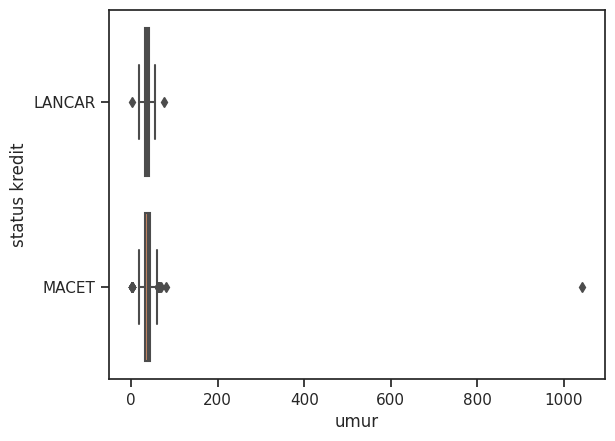

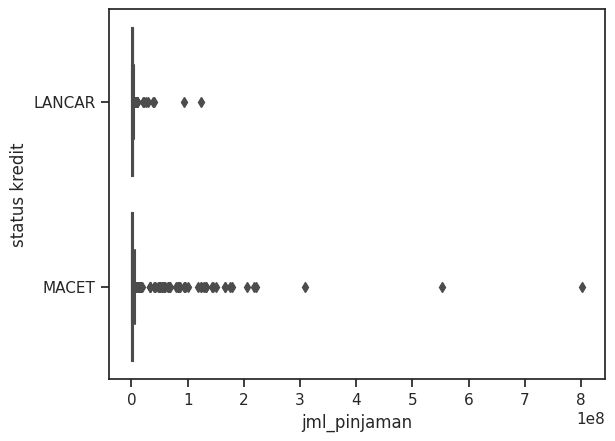

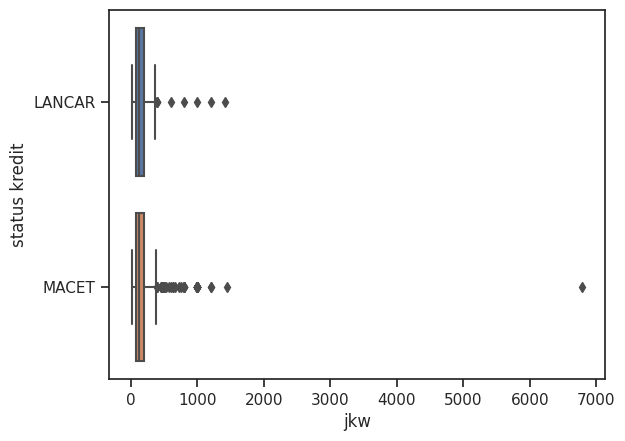

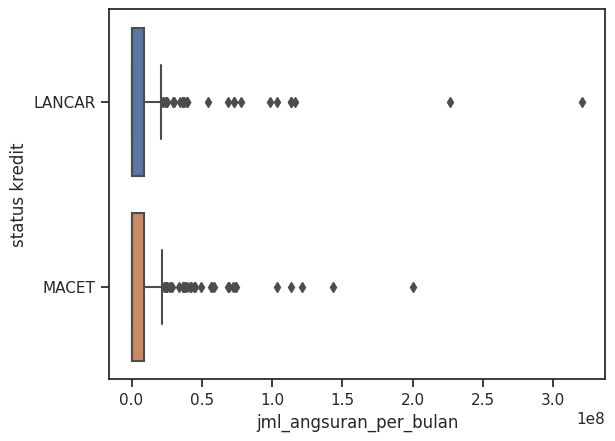

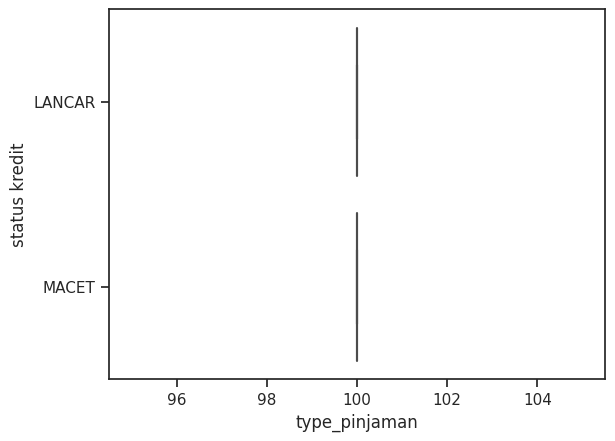

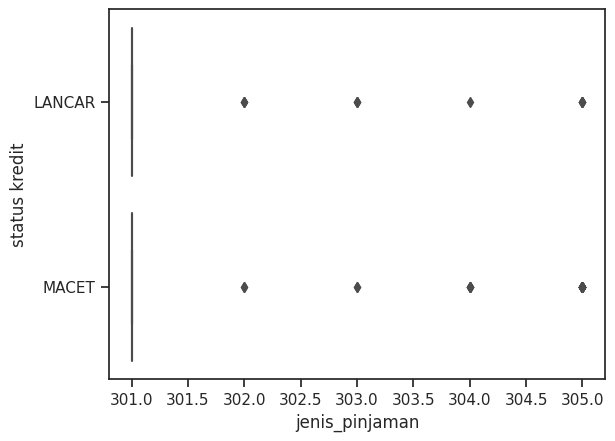

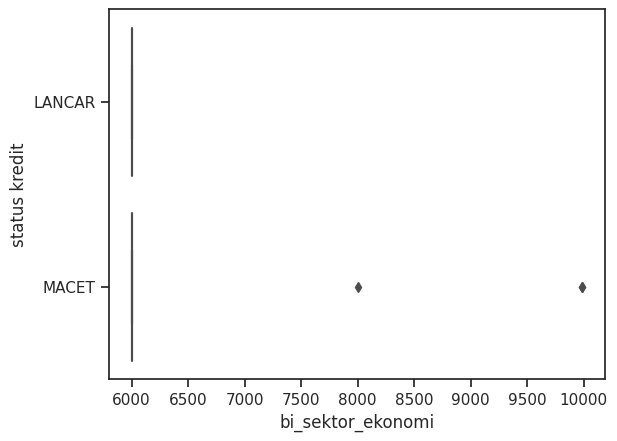

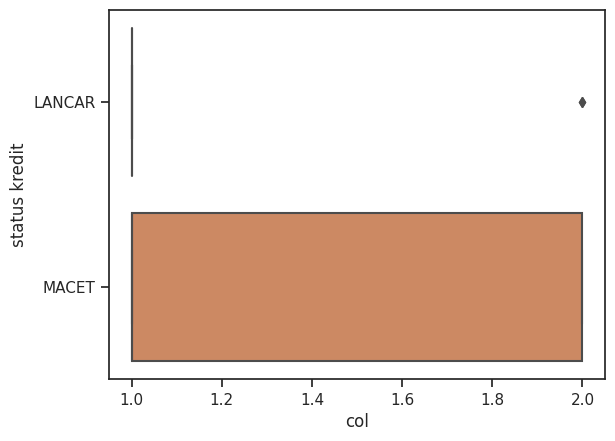

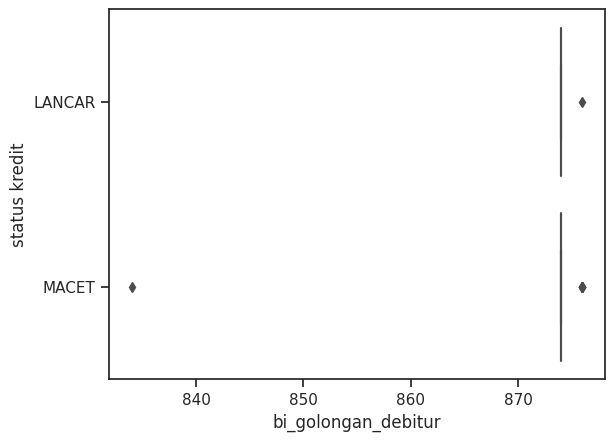

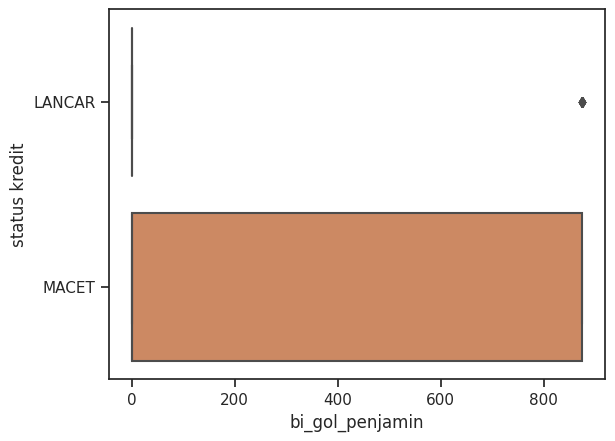

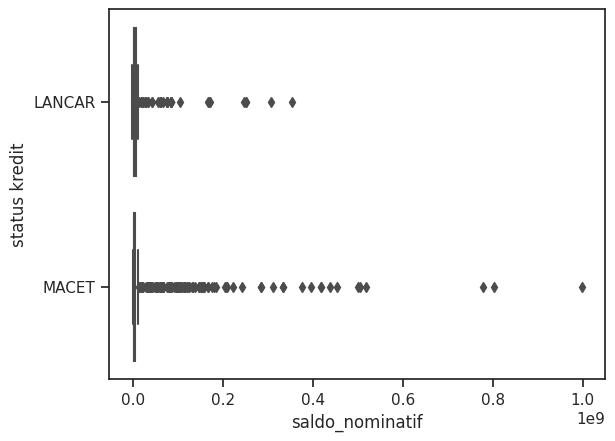

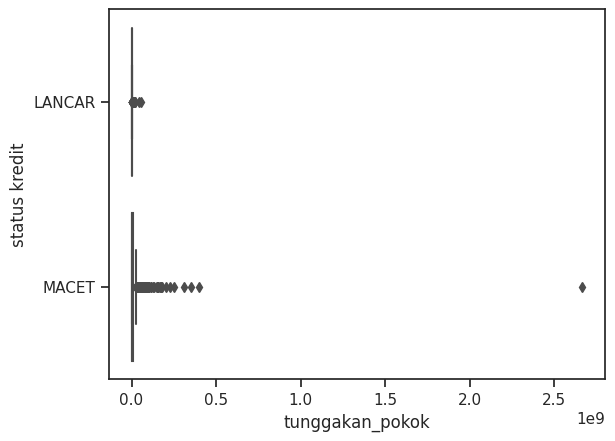

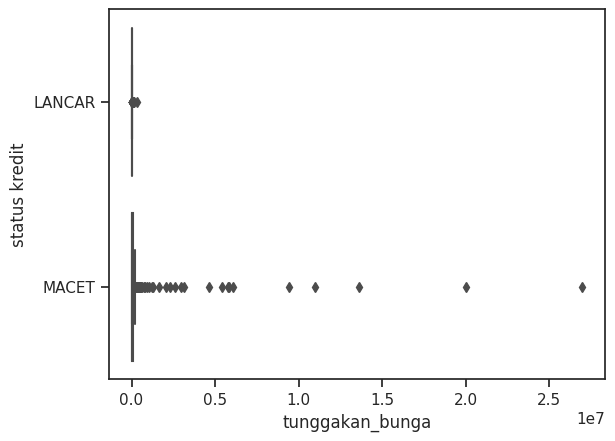

In [ ]:
# Visual Python: Visualization > Seaborn
intVar = df_miss_val.select_dtypes(include = ['int64', 'float64'])
for col in intVar.columns:
    p = sns.boxplot(x=col, y="status kredit", data=df_miss_val)
    plt.show()

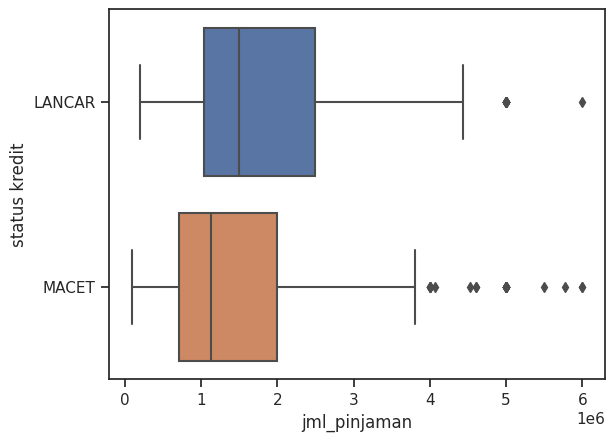

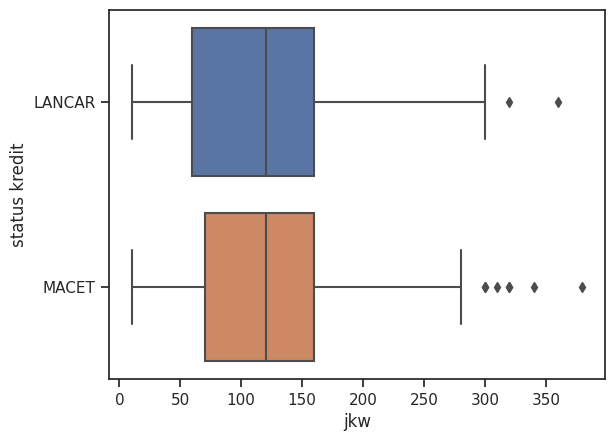

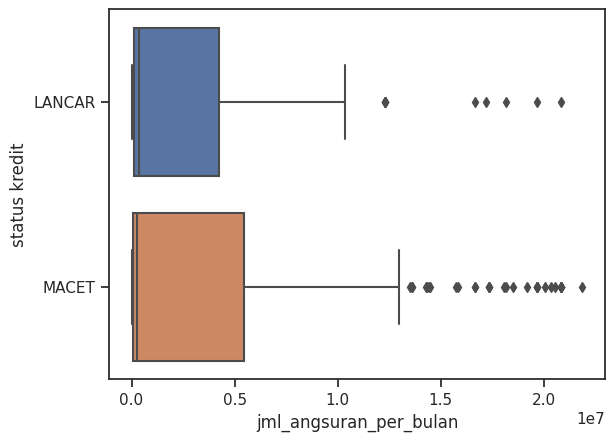

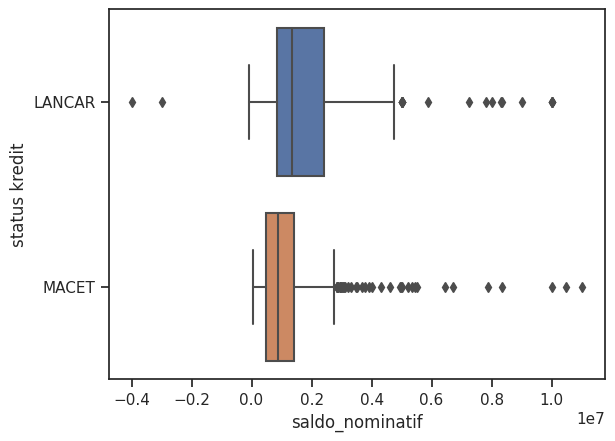

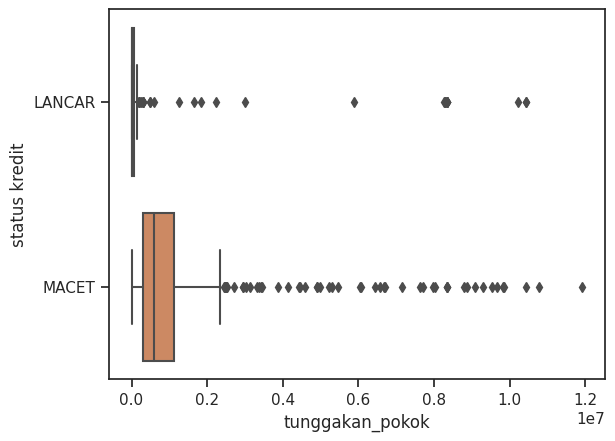

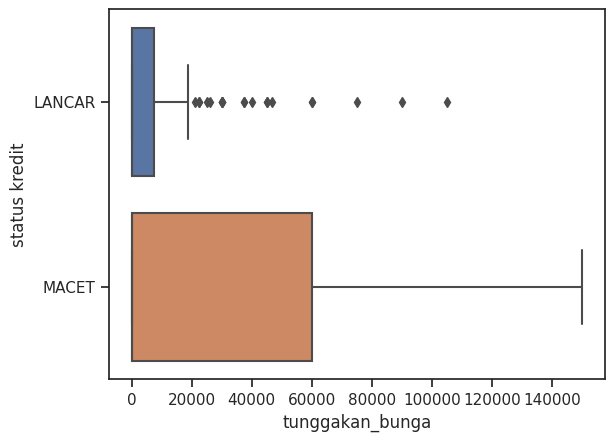

In [ ]:
df = df_miss_val.copy()

columns_outlier = ['jml_pinjaman','jkw',
                    'jml_angsuran_per_bulan',
                    'saldo_nominatif',
                    'tunggakan_pokok',
                    'tunggakan_bunga']

for col in columns_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # IQR is interquartile range.

    # Menggunakan operator bitwise & untuk menggabungkan kondisi
    X1 = df[~((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR))]

    # Memasukkan perintah plot ke dalam loop
    p = sns.boxplot(x=col, y="status kredit", data=X1)
    plt.show()

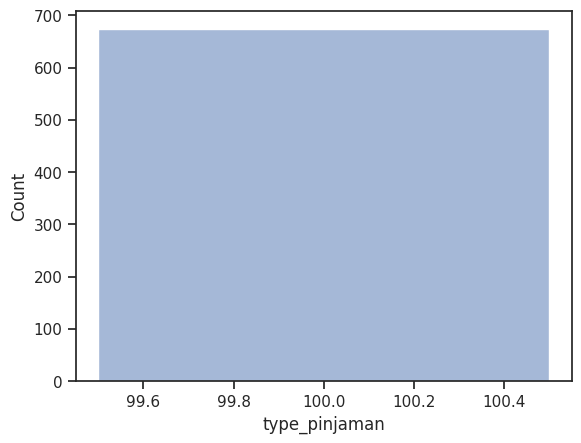

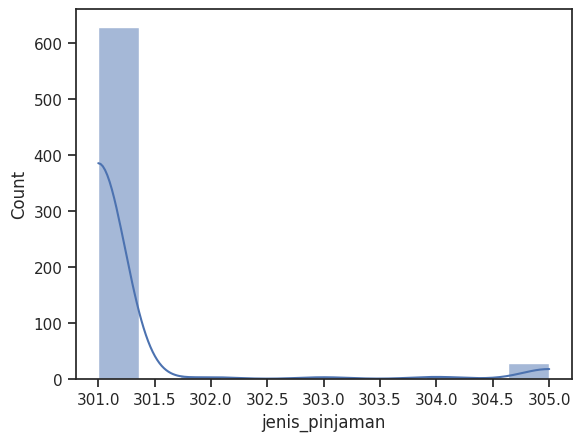

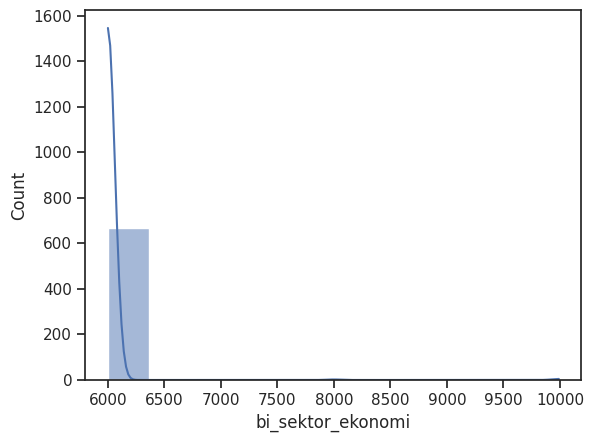

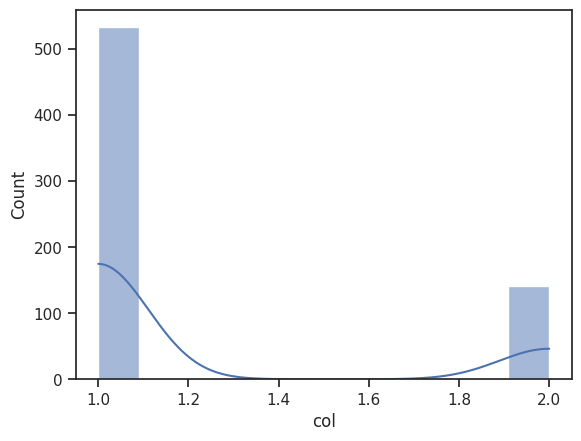

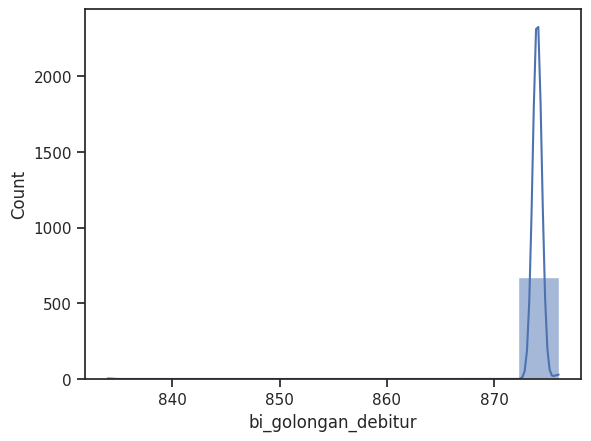

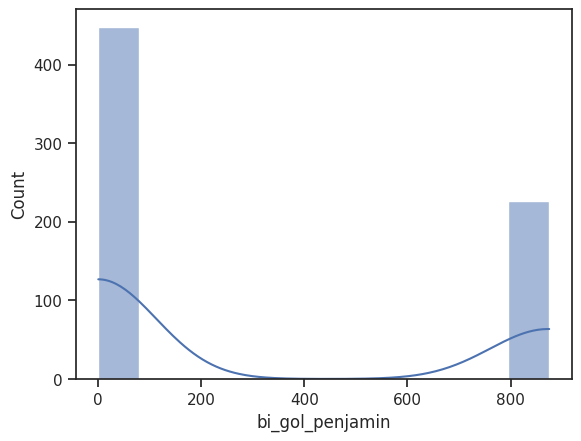

In [ ]:
columns_categ = ['type_pinjaman',
                'jenis_pinjaman',
                'bi_sektor_ekonomi',
                'col',
                'bi_golongan_debitur',
                'bi_gol_penjamin']

for col in columns_categ:
    sns.histplot(data=X1, x=col, kde=True)
    plt.show()

In [ ]:
df['jenis_kelamin'] = df['jenis_kelamin'].replace(to_replace="LAKI-LAKI", value="L")
df['jenis_kelamin'] = df['jenis_kelamin'].replace(to_replace="PEREMPUAN", value="P")
df['jenis_kelamin'] = df['jenis_kelamin'].replace(to_replace="PRIA", value="L")
df['jenis_kelamin'] = df['jenis_kelamin'].replace(to_replace="WANITA", value="P")

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))
X = df.copy()

jenis_kelamin :  {'L', 'P'}
status kredit :  {'LANCAR', 'MACET'}


In [ ]:
X

,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,40,345000.0,10.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET
1,L,31,350000.0,70.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET
3,P,2,459168.0,NaN,38264.0,100,301,6000.0,1,874,875,459168.0,382640.0,0.0,MACET
4,P,34,3055499.0,80.0,38193741.0,100,301,6000.0,1,874,875,3055499.0,152774948.0,0.0,MACET
5,L,49,2000000.0,NaN,0.0,100,301,6000.0,1,874,875,-85000.0,0.0,0.0,LANCAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,L,38,1000000.0,160.0,70000.0,100,301,6000.0,2,874,0,812500.0,812500.0,97500.0,MACET
762,P,36,1000000.0,120.0,9083337.0,100,301,6000.0,2,874,0,429000.0,429000.0,45000.0,MACET
763,L,28,2000000.0,100.0,260000.0,100,301,6000.0,2,874,0,600000.0,600000.0,180000.0,MACET
764,P,31,1312500.0,70.0,198750.0,100,301,6000.0,2,874,0,1312500.0,1312500.0,78750.0,MACET


In [ ]:
_vp_print(_vp_check_module_loaded(["plt","sns"]))

[true, true]


In [ ]:
# General Look at the Missing Values
print(df_miss_val.isnull().sum())

jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       3
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         1
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64


In [ ]:
X = X.dropna() # jika ada MV minimal satu di salah satu kolom, maka baris di hapus
#df.dropna(how='all') # jika ada MV di semua kolom, maka baris di hapus
#df.dropna(thresh=2) # jika ada MV minimal di salah 2 kolom, maka baris di hapus
#df.dropna(subset=['Pekerjaan'])[:7] # jika ada MV minimal satu di salah kolom Dist_Hospital
print(df_miss_val.shape, X.shape)
X.head()

(744, 15) (740, 15)


,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,P,40,345000.0,10.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET
1,L,31,350000.0,70.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET
4,P,34,3055499.0,80.0,38193741.0,100,301,6000.0,1,874,875,3055499.0,152774948.0,0.0,MACET
7,L,27,4435001.0,80.0,671098.0,100,301,6000.0,1,874,875,4435001.0,0.0,0.0,LANCAR
9,L,49,1443750.0,150.0,107800.0,100,301,6000.0,1,874,875,1617000.0,1078000.0,0.0,MACET


In [ ]:
print(X.isnull().sum())

jenis_kelamin             0
umur                      0
jml_pinjaman              0
jkw                       0
jml_angsuran_per_bulan    0
type_pinjaman             0
jenis_pinjaman            0
bi_sektor_ekonomi         0
col                       0
bi_golongan_debitur       0
bi_gol_penjamin           0
saldo_nominatif           0
tunggakan_pokok           0
tunggakan_bunga           0
status kredit             0
dtype: int64


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 765
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   jenis_kelamin           740 non-null    category
 1   umur                    740 non-null    int64   
 2   jml_pinjaman            740 non-null    float64 
 3   jkw                     740 non-null    float64 
 4   jml_angsuran_per_bulan  740 non-null    float64 
 5   type_pinjaman           740 non-null    int64   
 6   jenis_pinjaman          740 non-null    int64   
 7   bi_sektor_ekonomi       740 non-null    float64 
 8   col                     740 non-null    int64   
 9   bi_golongan_debitur     740 non-null    int64   
 10  bi_gol_penjamin         740 non-null    int64   
 11  saldo_nominatif         740 non-null    float64 
 12  tunggakan_pokok         740 non-null    float64 
 13  tunggakan_bunga         740 non-null    float64 
 14  status kredit           74

In [ ]:
print(X.shape)
for col in catVar.columns:
    if col != 'status kredit':
        transformasi = pd.get_dummies(X[col], prefix='')
        X = pd.concat([X, transformasi], axis = 1)
        # Hapus Variabel Kategorik Awal, Sudah tidak diperlukan
        try:
            X.drop([col], axis=1, inplace=True)
        except Exception as err_:
            print(err_)
print(X.shape)
X

(740, 15)
(740, 16)


,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit,_L,_P
0,40,345000.0,10.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET,0,1
1,31,350000.0,70.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET,1,0
4,34,3055499.0,80.0,38193741.0,100,301,6000.0,1,874,875,3055499.0,152774948.0,0.0,MACET,0,1
7,27,4435001.0,80.0,671098.0,100,301,6000.0,1,874,875,4435001.0,0.0,0.0,LANCAR,1,0
9,49,1443750.0,150.0,107800.0,100,301,6000.0,1,874,875,1617000.0,1078000.0,0.0,MACET,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,38,1000000.0,160.0,70000.0,100,301,6000.0,2,874,0,812500.0,812500.0,97500.0,MACET,1,0
762,36,1000000.0,120.0,9083337.0,100,301,6000.0,2,874,0,429000.0,429000.0,45000.0,MACET,0,1
763,28,2000000.0,100.0,260000.0,100,301,6000.0,2,874,0,600000.0,600000.0,180000.0,MACET,1,0
764,31,1312500.0,70.0,198750.0,100,301,6000.0,2,874,0,1312500.0,1312500.0,78750.0,MACET,0,1


In [ ]:
# Saving the preprocessed Data for future use/analysis
X.to_csv("/content/drive/MyDrive/df/serkom_preprocessed.csv", encoding='utf8', index=False)

In [ ]:
N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
X.head()

baris =  744 , Kolom (jumlah variabel) =  15


,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit,_L,_P
0,40,345000.0,10.0,345000.0,100,301,6000.0,1,874,875,345000.0,345000.0,0.0,MACET,0,1
1,31,350000.0,70.0,55716.0,100,301,6000.0,1,874,875,390000.0,111428.0,0.0,MACET,1,0
4,34,3055499.0,80.0,38193741.0,100,301,6000.0,1,874,875,3055499.0,152774948.0,0.0,MACET,0,1
7,27,4435001.0,80.0,671098.0,100,301,6000.0,1,874,875,4435001.0,0.0,0.0,LANCAR,1,0
9,49,1443750.0,150.0,107800.0,100,301,6000.0,1,874,875,1617000.0,1078000.0,0.0,MACET,1,0


In [ ]:
predictor = X.loc[:, ~X.columns.isin(['status kredit'])]
target = X['status kredit']

xTrain, xTest, yTrain, yTest = train_test_split(predictor, target, test_size=0.3, random_state=50)
print(xTrain.shape, yTrain.shape)
print(xTest.shape, yTest.shape)

(518, 15) (518,)
(222, 15) (222,)


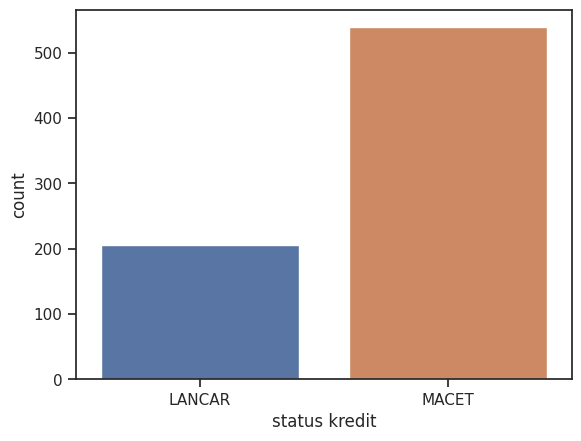

Counter({'MACET': 536, 'LANCAR': 204})


In [ ]:
# Visual Python: Visualization > Seaborn
from collections import Counter

sns.countplot(data=df, x='status kredit')
plt.show()

D = Counter(X['status kredit'])
print(D)

In [ ]:
# Decision Tree: http://scikit-learn.org/stable/modules/tree.html
DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(xTrain, yTrain)
prediksi_DT = DT.predict(xTest)

print(confusion_matrix(yTest, prediksi_DT))
print(classification_report(yTest, prediksi_DT))

[[ 42   8]
 [ 15 157]]
              precision    recall  f1-score   support

      LANCAR       0.74      0.84      0.79        50
       MACET       0.95      0.91      0.93       172

    accuracy                           0.90       222
   macro avg       0.84      0.88      0.86       222
weighted avg       0.90      0.90      0.90       222



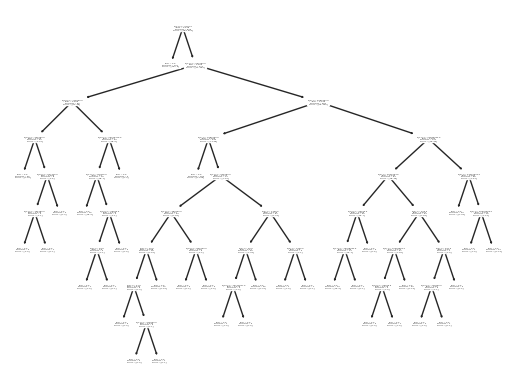

In [ ]:
# Warning cell ini butuh waktu Lama untuk selesai!...

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(xTrain, yTrain)
p = tree.plot_tree(clf)

In [ ]:
mulai = time.time()
scores_dt = cross_val_score(DT, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Decision Tree: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_dt.mean(), scores_dt.std() * 2, waktu))

Accuracy Decision Tree: 0.94 (+/- 0.06), Waktu = 0.150 detik


In [ ]:
reglog = LogisticRegression().fit(xTrain, yTrain)
prediksi_regLog = reglog.predict(xTest)
print(confusion_matrix(yTest, prediksi_regLog))
print(classification_report(yTest, prediksi_regLog))

[[ 40  10]
 [ 17 155]]
              precision    recall  f1-score   support

      LANCAR       0.70      0.80      0.75        50
       MACET       0.94      0.90      0.92       172

    accuracy                           0.88       222
   macro avg       0.82      0.85      0.83       222
weighted avg       0.89      0.88      0.88       222



In [ ]:
mulai = time.time()
scores_regLog = cross_val_score(reglog, predictor, target, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.78 (+/- 0.10), Waktu = 0.848 detik


RegLog     0.729730
DecTree    0.878378
dtype: float64

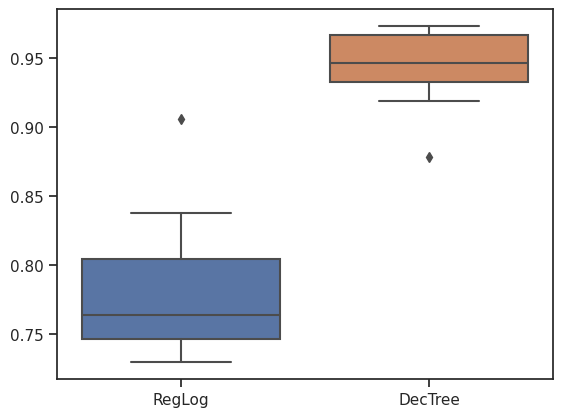

In [ ]:
# Visualisasi untuk mengevaluasi & membandingkan model dengan lebih baik lagi
X3 = pd.DataFrame({'RegLog': scores_regLog, "DecTree":scores_dt})
p = sns.boxplot(data = X3)
X3.min()